In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy


In [2]:
# Data asli
data = {
    'Kecamatan': [
        'Batang Onang', 'Dolok', 'Dolok Sigompulon', 'Halongonan', 'Halongonan Timur', 'Hulu Sihapas', 'Padang Bolak',
        'Padang Bolak Julu', 'Padang Bolak Tenggara', 'Portibi', 'Simangambat', 'Ujung Batu',
        'Batang Onang', 'Dolok', 'Dolok Sigompulon', 'Halongonan', 'Halongonan Timur', 'Hulu Sihapas', 'Padang Bolak',
        'Padang Bolak Julu', 'Padang Bolak Tenggara', 'Portibi', 'Simangambat', 'Ujung Batu'
    ],
    'Tahun': [
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020
    ],
    'Jumlah Kecelakaan': [93, 103, 56, 91, 127, 165, 169, 92, 124, 153, 55, 70, 196, 103, 140, 91, 124, 90, 90, 155, 77, 182, 80, 182],
    'Jumlah Meninggal': [3, 3, 4, 7, 7, 4, 3, 8, 8, 8, 3, 9, 6, 3, 1, 8, 1, 2, 3, 9, 1, 8, 3, 4],
    'Jumlah Luka Berat': [17, 15, 12, 6, 8, 19, 12, 17, 12, 10, 16, 10, 15, 12, 13, 1, 1, 19, 13, 17, 10, 9, 9, 1],
    'Jumlah Luka Ringan': [19, 33, 26, 11, 34, 41, 26, 17, 49, 45, 42, 10, 27, 47, 43, 40, 17, 46, 13, 44, 41, 39, 42, 33],
    'Jumlah Kendaraan': [411, 343, 162, 121, 387, 299, 245, 252, 356, 208, 234, 142, 251, 193, 194, 125, 206, 149, 187, 215, 386, 177, 316, 484],
    'Kecepatan Rata-rata': [46, 43, 55, 48, 64, 52, 59, 78, 47, 59, 62, 45, 42, 58, 67, 64, 66, 48, 79, 59, 74, 44, 74, 43]
}

df = pd.DataFrame(data)


In [3]:
# Memilih variabel
features = ['Jumlah Kecelakaan', 'Jumlah Meninggal', 'Jumlah Luka Berat', 'Jumlah Luka Ringan', 'Jumlah Kendaraan', 'Kecepatan Rata-rata']

# Normalisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Mengubah hasil normalisasi ke dalam DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)


In [4]:
# Mengonversi DataFrame menjadi array numpy
X = df_scaled.values

# Menentukan jumlah cluster
k = 3
n_features = X.shape[1]

# Inisialisasi centroid secara acak
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Iterasi K-Means
max_iter = 100
for iteration in range(max_iter):
    # Menyimpan centroid sebelumnya
    centroids_old = deepcopy(centroids)
    
    # Menghitung jarak dan menentukan cluster
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    
    # Mengonversi list clusters menjadi array numpy
    clusters = np.array(clusters)
    
    # Memperbarui centroid
    for i in range(k):
        points = X[clusters == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
    
    # Mengecek konvergensi
    if np.all(centroids == centroids_old):
        print(f"Konvergensi tercapai pada iterasi ke-{iteration+1}")
        break


Konvergensi tercapai pada iterasi ke-4


In [5]:
# Membuat DataFrame untuk centroid akhir
centroids_df = pd.DataFrame(centroids, columns=features)
centroids_df.index = ['Centroid 1', 'Centroid 2', 'Centroid 3']
print("\nCentroid Akhir:")
print(centroids_df)



Centroid Akhir:
            Jumlah Kecelakaan  Jumlah Meninggal  Jumlah Luka Berat  \
Centroid 1           1.061397          0.713200          -0.008032   
Centroid 2          -0.118514         -0.416402          -0.686179   
Centroid 3          -0.851286         -0.310087           0.540834   

            Jumlah Luka Ringan  Jumlah Kendaraan  Kecepatan Rata-rata  
Centroid 1            0.512648          0.465850            -0.530212  
Centroid 2           -0.430198         -0.541025             0.693115  
Centroid 3           -0.121089          0.006708            -0.067790  


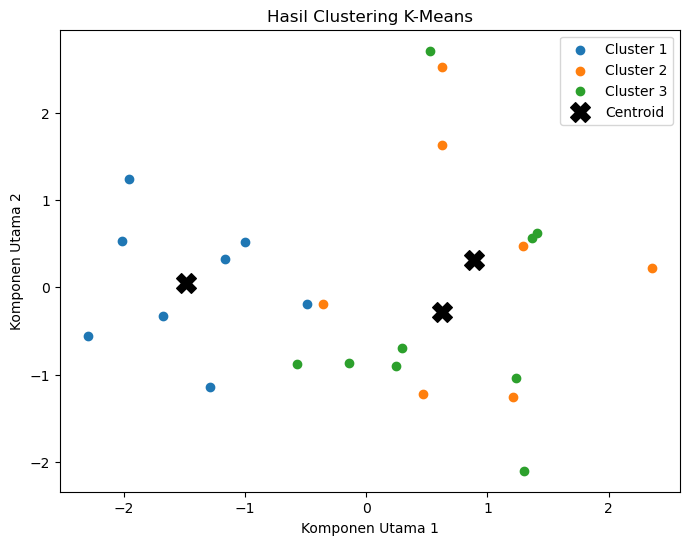

In [6]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
for i in range(k):
    points = X_pca[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
    
# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='black', label='Centroid')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend()
plt.show()
